
Temperature Analysis Results:
--------------------------------------------------

Most Similar Month: Dec
Kansas City: High 43°F, Low 28°F
Toronto: High 35°F, Low 25°F
Average temperature difference: 5.5°F

Most Different Month: Mar
Kansas City: High 58°F, Low 38°F
Toronto: High 39°F, Low 27°F
Average temperature difference: 15.0°F

Monthly Temperature Differences:
Month  High_Temp_Diff  Low_Temp_Diff  Avg_Temp_Diff
  Jan              11              6            8.5
  Feb              15              9           12.0
  Mar              19             11           15.0
  Apr              16             10           13.0
  May              13             10           11.5
  Jun              13             11           12.0
  Jul              13             10           11.5
  Aug              12              8           10.0
  Sep              12              7            9.5
  Oct              12              6            9.0
  Nov              10              4            7.0
  Dec  

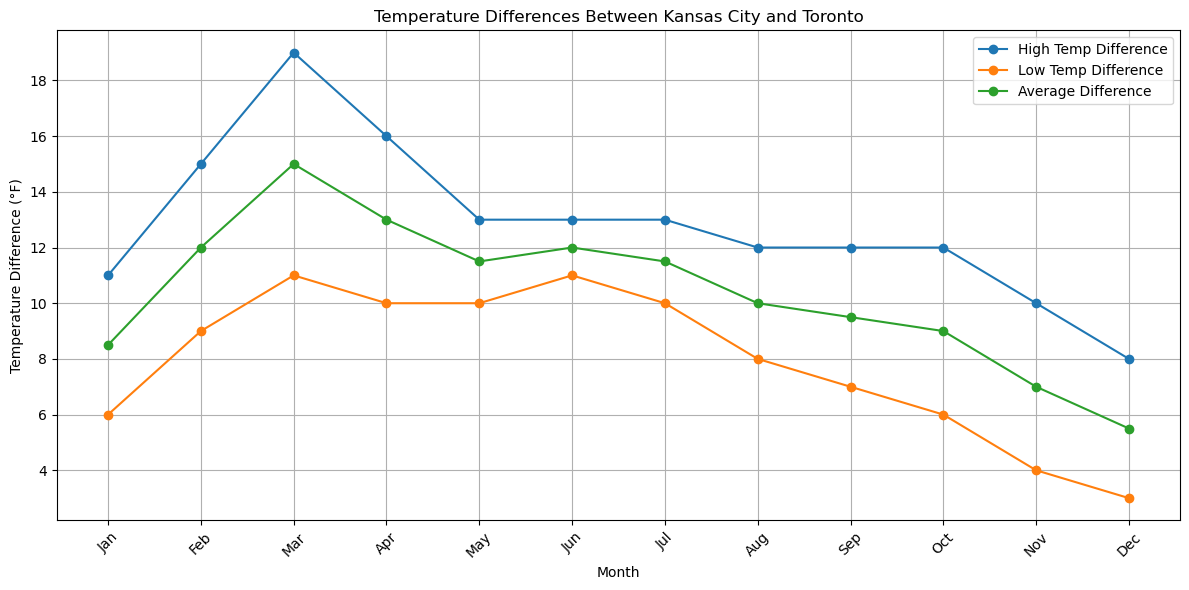

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create monthly data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Temperature data
kc_high = [41, 46, 58, 67, 76, 85, 90, 88, 80, 68, 55, 43]
kc_low = [24, 28, 38, 48, 58, 68, 73, 70, 62, 50, 38, 28]
tor_high = [30, 31, 39, 51, 63, 72, 77, 76, 68, 56, 45, 35]
tor_low = [18, 19, 27, 38, 48, 57, 63, 62, 55, 44, 34, 25]

# Create DataFrame
df = pd.DataFrame({
    'Month': months,
    'KC_High': kc_high,
    'KC_Low': kc_low,
    'TOR_High': tor_high,
    'TOR_Low': tor_low
})

# Calculate temperature differences
df['High_Temp_Diff'] = abs(df['KC_High'] - df['TOR_High'])
df['Low_Temp_Diff'] = abs(df['KC_Low'] - df['TOR_Low'])
df['Avg_Temp_Diff'] = (df['High_Temp_Diff'] + df['Low_Temp_Diff']) / 2

# Find months with most similar and most different temperatures
most_similar = df.loc[df['Avg_Temp_Diff'].idxmin()]
most_different = df.loc[df['Avg_Temp_Diff'].idxmax()]

print("\nTemperature Analysis Results:")
print("-" * 50)
print(f"\nMost Similar Month: {most_similar['Month']}")
print(f"Kansas City: High {most_similar['KC_High']}°F, Low {most_similar['KC_Low']}°F")
print(f"Toronto: High {most_similar['TOR_High']}°F, Low {most_similar['TOR_Low']}°F")
print(f"Average temperature difference: {most_similar['Avg_Temp_Diff']:.1f}°F")

print(f"\nMost Different Month: {most_different['Month']}")
print(f"Kansas City: High {most_different['KC_High']}°F, Low {most_different['KC_Low']}°F")
print(f"Toronto: High {most_different['TOR_High']}°F, Low {most_different['TOR_Low']}°F")
print(f"Average temperature difference: {most_different['Avg_Temp_Diff']:.1f}°F")

# Display full comparison table
print("\nMonthly Temperature Differences:")
print(df[['Month', 'High_Temp_Diff', 'Low_Temp_Diff', 'Avg_Temp_Diff']].to_string(index=False))

# Create visualization
plt.figure(figsize=(12, 6))
plt.plot(months, df['High_Temp_Diff'], marker='o', label='High Temp Difference')
plt.plot(months, df['Low_Temp_Diff'], marker='o', label='Low Temp Difference')
plt.plot(months, df['Avg_Temp_Diff'], marker='o', label='Average Difference')
plt.title('Temperature Differences Between Kansas City and Toronto')
plt.xlabel('Month')
plt.ylabel('Temperature Difference (°F)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Temperature Difference Buckets:
--------------------------------------------------

Very Similar (Average difference range: 5.5°F - 8.5°F)
Months: Jan, Nov, Dec

Somewhat Similar (Average difference range: 9.0°F - 10.0°F)
Months: Aug, Sep, Oct

Somewhat Different (Average difference range: 11.5°F - 12.0°F)
Months: Feb, May, Jun, Jul

Very Different (Average difference range: 13.0°F - 15.0°F)
Months: Mar, Apr


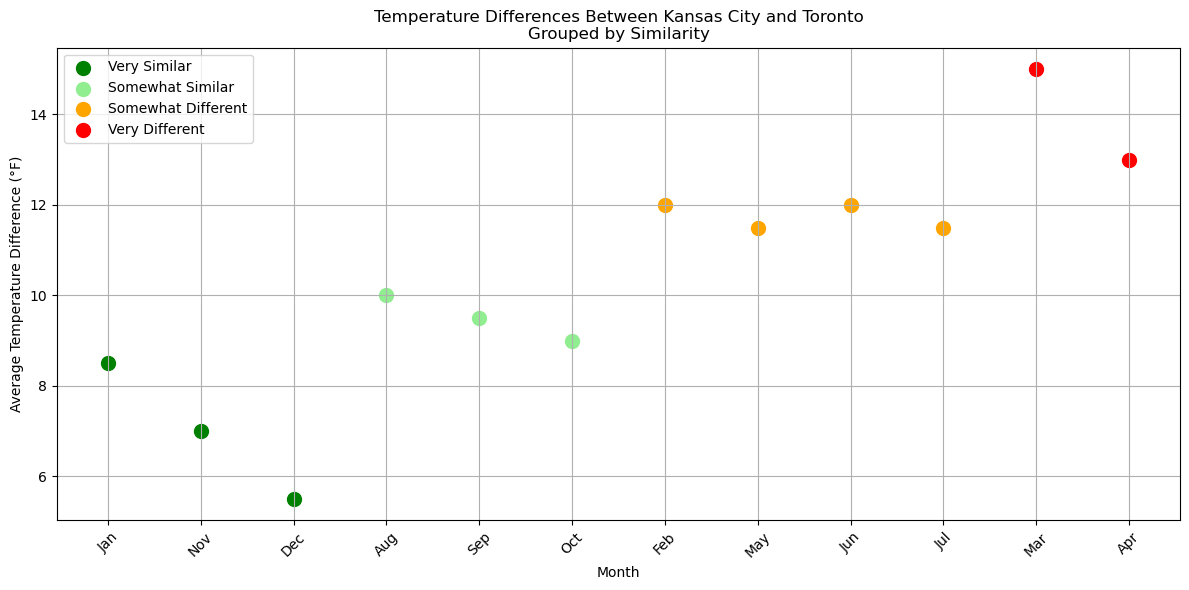

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Create monthly data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Temperature data
kc_high = [41, 46, 58, 67, 76, 85, 90, 88, 80, 68, 55, 43]
kc_low = [24, 28, 38, 48, 58, 68, 73, 70, 62, 50, 38, 28]
tor_high = [30, 31, 39, 51, 63, 72, 77, 76, 68, 56, 45, 35]
tor_low = [18, 19, 27, 38, 48, 57, 63, 62, 55, 44, 34, 25]


# Create DataFrame
df = pd.DataFrame({
    'Month': months,
    'KC_High': kc_high,
    'KC_Low': kc_low,
    'TOR_High': tor_high,
    'TOR_Low': tor_low
})

# Calculate temperature differences
df['High_Temp_Diff'] = abs(df['KC_High'] - df['TOR_High'])
df['Low_Temp_Diff'] = abs(df['KC_Low'] - df['TOR_Low'])
df['Avg_Temp_Diff'] = (df['High_Temp_Diff'] + df['Low_Temp_Diff']) / 2

# Create buckets using quartiles
df['Difference_Bucket'] = pd.qcut(df['Avg_Temp_Diff'], 
                                q=4, 
                                labels=['Very Similar', 'Somewhat Similar', 
                                       'Somewhat Different', 'Very Different'])

# Sort by average difference for clearer presentation
df_sorted = df.sort_values('Avg_Temp_Diff')

print("\nTemperature Difference Buckets:")
print("-" * 50)

for bucket in ['Very Similar', 'Somewhat Similar', 'Somewhat Different', 'Very Different']:
    bucket_data = df[df['Difference_Bucket'] == bucket]
    print(f"\n{bucket} (Average difference range: {bucket_data['Avg_Temp_Diff'].min():.1f}°F - {bucket_data['Avg_Temp_Diff'].max():.1f}°F)")
    print("Months:", ', '.join(bucket_data['Month'].tolist()))
    
# Create visualization with buckets
plt.figure(figsize=(12, 6))
colors = {'Very Similar': 'green', 
          'Somewhat Similar': 'lightgreen',
          'Somewhat Different': 'orange', 
          'Very Different': 'red'}

for bucket in colors.keys():
    bucket_data = df[df['Difference_Bucket'] == bucket]
    plt.scatter(bucket_data['Month'], bucket_data['Avg_Temp_Diff'], 
               label=bucket, c=colors[bucket], s=100)

plt = plt

plt.title('Temperature Differences Between Kansas City and Toronto\nGrouped by Similarity')
plt.xlabel('Month')
plt.ylabel('Average Temperature Difference (°F)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()